## Figure Extractor 

This guide provides instructions to build and run a Docker container for the Figure Extractor from a GitHub repository.


To build and run a Docker container starting from a GitHub repository, follow these steps:

1. **Clone the Repository**
    ```bash
    git clone https://github.com/zehrakorkusuz/figure-extractor
    cd figure-extractor
    ```

2. **Build the Docker Image**
    ```bash
    docker build -t figure-extractor .
    ```

3. **Run the Docker Container**
    ```bash
    docker run -p 5001:5001 figure-extractor
    ```

In [1]:
from figure_extractor import extract_figures

OUTPUT_DIR = 'figures_folder'

In [2]:
import requests

# Check if the service is up and running
url = 'http://localhost:5001/api/docs/'
response = requests.get(url)
if response.status_code == 200:
    print("Service is up and running.")
else:
    print("Service is not available. Please start the Docker server.")

Service is up and running.


### Process a Single PDF File

In [3]:
file_path = '2404.18021v1.pdf'  # Define the path to the PDF file
extraction_result = extract_figures(file_path, OUTPUT_DIR)

2024-12-11 01:12:13,452 - INFO - Extraction successful for 2404.18021v1.pdf
2024-12-11 01:12:13,571 - INFO - Extraction response: {
  "figures": [
    "/app/outputs/2404.18021v1-Figure1-1.png",
    "/app/outputs/2404.18021v1-Figure3-1.png",
    "/app/outputs/2404.18021v1-Figure7-1.png",
    "/app/outputs/2404.18021v1-Figure6-1.png",
    "/app/outputs/2404.18021v1-Figure5-1.png",
    "/app/outputs/2404.18021v1-Figure4-1.png",
    "/app/outputs/2404.18021v1-Figure2-1.png"
  ],
  "metadata_file": "2404.18021v1.json",
  "num_figures": 7,
  "num_tables": 1,
  "tables": [
    "/app/outputs/2404.18021v1-Table1-1.png"
  ]
}


In [4]:
extraction_result #paths are inside docker container; files are saved in the output_dir. i.e. figures_folder/figure_1.png

{'figures': ['/app/outputs/2404.18021v1-Figure1-1.png',
  '/app/outputs/2404.18021v1-Figure3-1.png',
  '/app/outputs/2404.18021v1-Figure7-1.png',
  '/app/outputs/2404.18021v1-Figure6-1.png',
  '/app/outputs/2404.18021v1-Figure5-1.png',
  '/app/outputs/2404.18021v1-Figure4-1.png',
  '/app/outputs/2404.18021v1-Figure2-1.png'],
 'metadata_file': '2404.18021v1.json',
 'num_figures': 7,
 'num_tables': 1,
 'tables': ['/app/outputs/2404.18021v1-Table1-1.png']}

In [5]:
print(f"Metadata file: {extraction_result['metadata_file']}")
print(f"Number of figures: {extraction_result['num_figures']}")
print(f"Number of tables: {extraction_result['num_tables']}")

Metadata file: 2404.18021v1.json
Number of figures: 7
Number of tables: 1


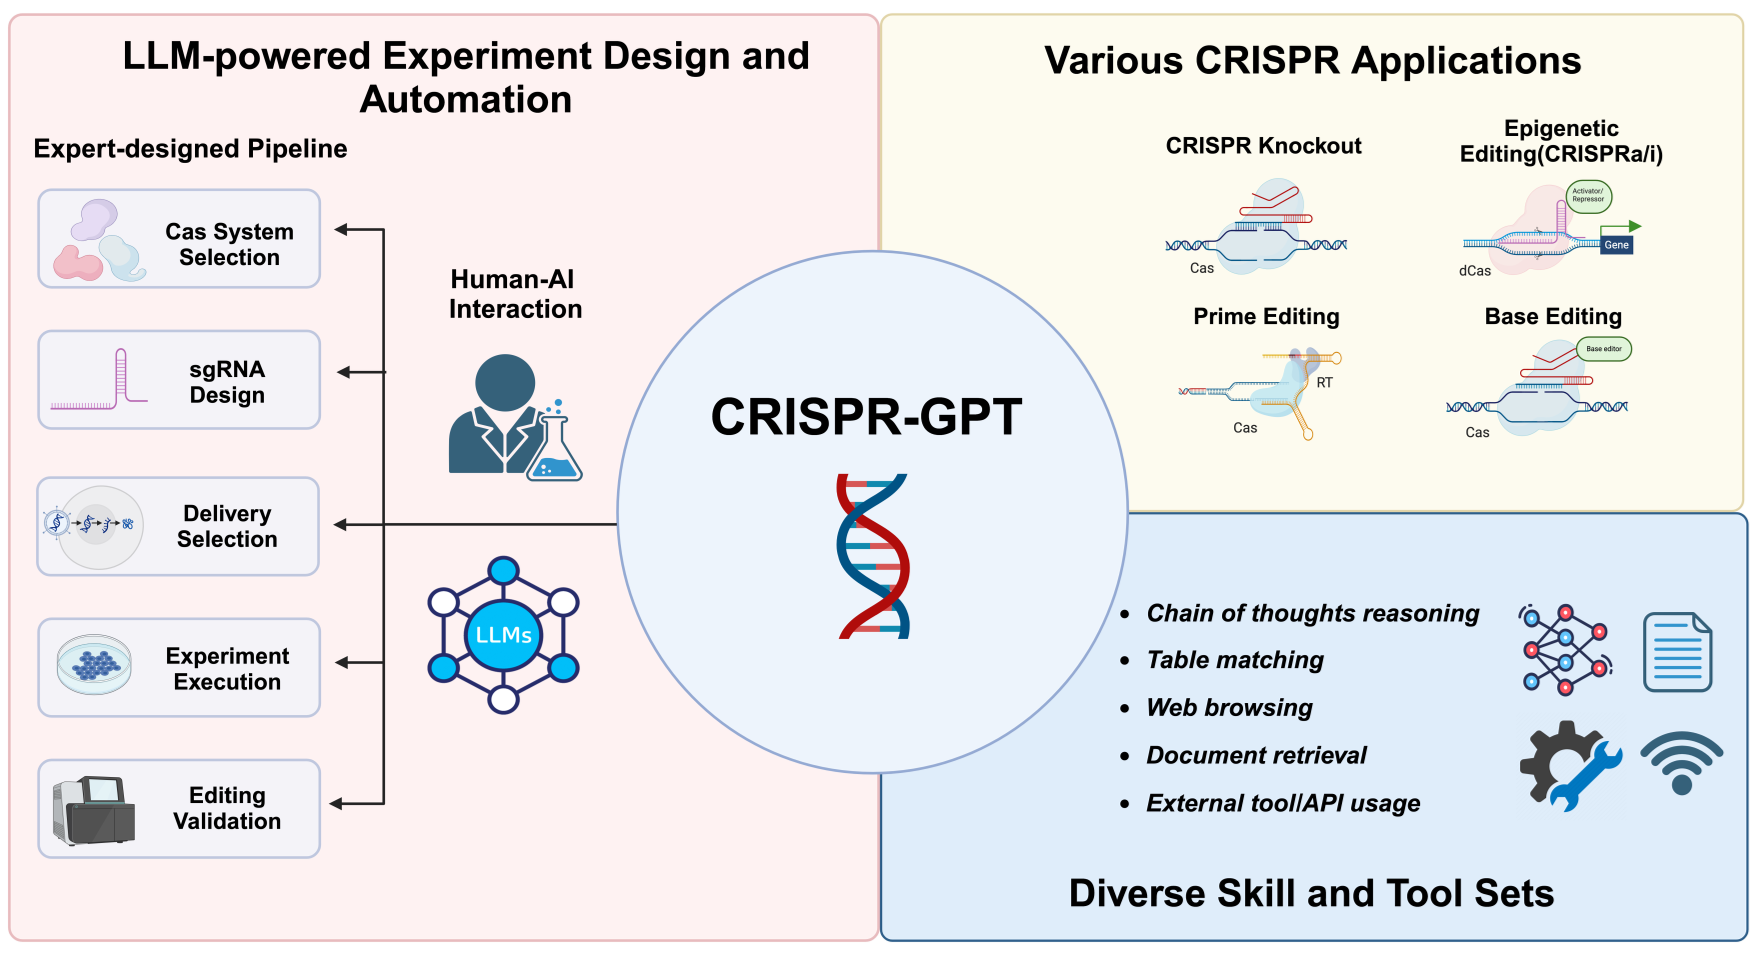

In [5]:
import os
from IPython.display import Image, display

# Access to a figure or table
figure_path = extraction_result['figures'][0]
# figure_path = extraction_result['tables'][0]
figure_file_name = os.path.basename(figure_path)
figure_path = os.path.join(OUTPUT_DIR, figure_file_name)

display(Image(filename=figure_path))

### Process a Directory


In [ ]:
directory = 'data' # directory to process the pdf files
extraction_result = extract_figures('data', 'figures_folder')

In [7]:
## PROCESSING TIME ##
avg_time = sum(doc['time_in_millis'] for doc in extraction_result) / len(extraction_result)
print(f"Average time to process a document: {avg_time/1000:.2f} seconds")

avg_page_processing_time = sum(doc['time_in_millis'] / doc['pages'] for doc in extraction_result) / len(extraction_result)
print(f"Average time to process a page: {avg_page_processing_time/1000:.2f} seconds")

Average time to process a document: 24.90 seconds
Average time to process a page: 0.86 seconds


In [ ]:
extraction_result # list of pdf files processed

```markdown
### Example Output JSON

The following is an example of the output JSON generated by the figure extractor. The paths have been updated to reflect the new directory structure.

```json
[
    {
        "document": "duplicate",
        "figures": [
            "figures_folder/duplicate-Figure1-1.png",
            "figures_folder/duplicate-Figure3-1.png",
            "figures_folder/duplicate-Figure7-1.png",
            "figures_folder/duplicate-Figure6-1.png",
            "figures_folder/duplicate-Figure5-1.png",
            "figures_folder/duplicate-Figure4-1.png",
            "figures_folder/duplicate-Figure2-1.png"
        ],
        "metadata_filename": "duplicate.json",
        "n_figures": 7,
        "n_tables": 1,
        "pages": 29,
        "tables": [
            "figures_folder/duplicate-Table1-1.png"
        ],
        "time_in_millis": 25524
    },
    {
        "document": "2404.18021v1",
        "figures": [
            "figures_folder/2404.18021v1-Figure1-1.png",
            "figures_folder/2404.18021v1-Figure3-1.png",
            "figures_folder/2404.18021v1-Figure7-1.png",
            "figures_folder/2404.18021v1-Figure6-1.png",
            "figures_folder/2404.18021v1-Figure5-1.png",
            "figures_folder/2404.18021v1-Figure4-1.png",
            "figures_folder/2404.18021v1-Figure2-1.png"
        ],
        "metadata_filename": "2404.18021v1.json",
        "n_figures": 7,
        "n_tables": 1,
        "pages": 29,
        "tables": [
            "figures_folder/2404.18021v1-Table1-1.png"
        ],
        "time_in_millis": 24295
    }
]
```
```

In [ ]:
# get the first document in the list
extraction_result[0]

### Get Figures Metadata and Captions Given an Index

Retrieve metadata and captions for figures and tables from the extracted results. The following variables are used in this process:

- **OUTPUT_DIR**: Directory where the extracted figures and tables are stored.
- **avg_page_processing_time**: Average time to process a page in milliseconds.
- **avg_time**: Average time to process a document in milliseconds.
- **caption**: Caption for a specific table.
- **caption_1**: Caption for the first figure in the document "duplicate".
- **caption_2**: Caption for the first table in the document "2404.18021v1".
- **directory**: Directory containing the PDF files to be processed.
- **extraction_result**: List of dictionaries containing extraction results for each document.
- **figure_1**: Path to the first figure in the document "duplicate".
- **figure_file_name**: File name of a specific figure.
- **figure_path**: Path to a specific figure or table.
- **file_path**: Path to the PDF file being processed.
- **image_text**: Text extracted from an image.
- **response**: Response object from the requests library indicating the status of the service.
- **table_2**: Path to the first table in the document "2404.18021v1".
- **url**: URL to check if the service is up and running.

['/Users/zehrakorkusuz/figure-extractor/figures_folder/duplicate-Table1-1.png']
figures_folder/duplicate-Table1-1.png


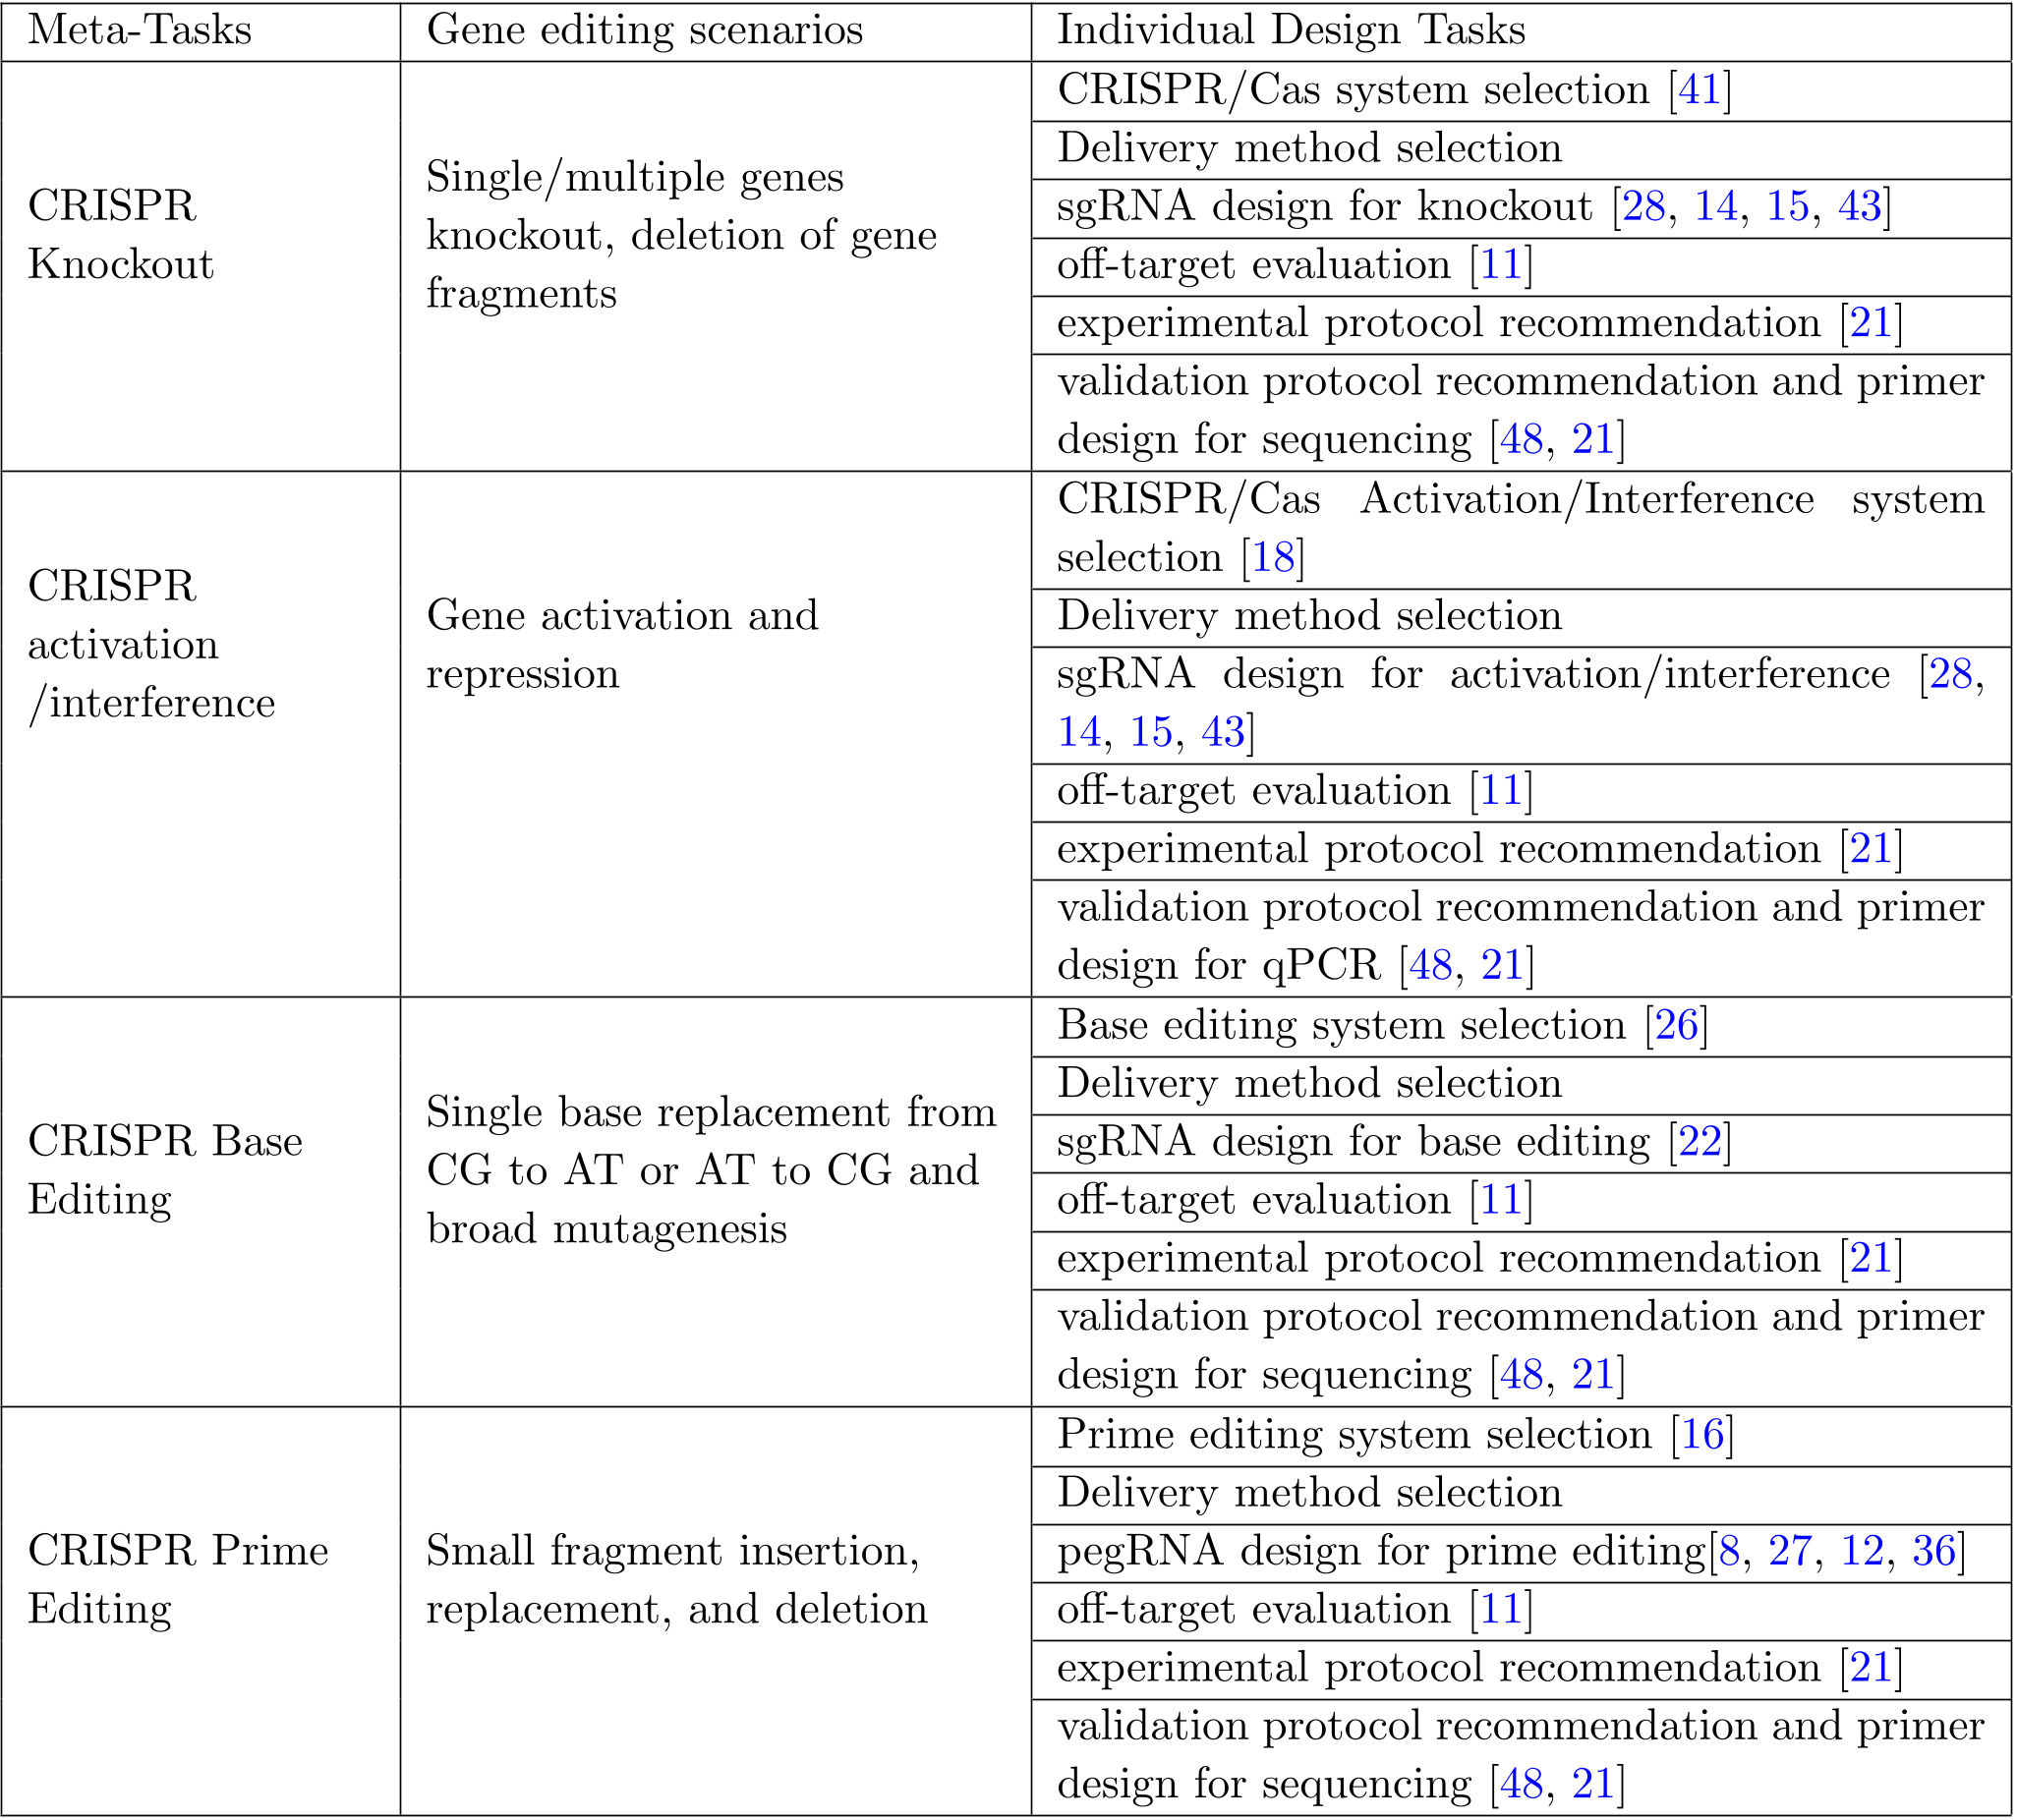

Title: Table 1: List of meta-mode tasks (4 major meta-task and 22 specific tasks)
Image Text: Prime editing system selection [16] Delivery method selection pegRNA design for prime editing[8, 27, 12, 36] off-target evaluation [11] experimental protocol recommendation [21] validation protocol recommendation and primer design for sequencing [48, 21] Small fragment insertion, replacement, and deletion CRISPR Prime Editing Base editing system selection [26] Delivery method selection sgRNA design for base editing [22] off-target evaluation [11] experimental protocol recommendation [21] validation protocol recommendation and primer design for sequencing [48, 21] Single base replacement from CG to AT or AT to CG and broad mutagenesis CRISPR Base Editing CRISPR/Cas Activation/Interference system selection [18] Delivery method selection sgRNA design for activation/interference [28, 14, 15, 43] off-target evaluation [11] experimental protocol recommendation [21] validation protocol recommendation

In [78]:
from IPython.display import Image, display
import json, os

def read_metadata(metadata_file_path):
    with open(metadata_file_path, 'r') as f:
        metadata = json.load(f)
    return metadata

def generate_display_image(extraction_result, document_name, figure_type, figure_number):
    """
    Generate the display image path based on the document name, figure type, and figure number.

    Args:
        document_name (str): Name of the document (e.g., "duplicate", "2404.18021v1").
        figure_type (str): Type of the figure (e.g., "Figure", "Table").
        figure_number (int): Number of the figure (e.g., 1, 2, 3).

    Returns:
        tuple: The full file path of the requested image or a message indicating it was not found, and the caption.
    """

    # Search for the document
    for doc in extraction_result:
        if doc['document'] == document_name:
            if figure_type.lower() == 'figure':
                figure_list = doc['figures']
            elif figure_type.lower() == 'table':
                figure_list = doc['tables']
                print(figure_list)
            else:
                figure_list = doc['figures'] + doc['tables']
            
            # Check if the figure number is within the range
            if figure_number <= len(figure_list):
                # Find the corresponding caption
                metadata_filename = doc['metadata_filename']
                metadata_file_path = os.path.join(OUTPUT_DIR, metadata_filename)

                metadata = read_metadata(metadata_file_path)

                for item in metadata:
                    figure_file_name = os.path.basename(item["renderURL"])
                    figure_path = os.path.join(OUTPUT_DIR, figure_file_name)
                    print(figure_path)
                    if int(item["name"]) == int(figure_number):
                        if figure_type.lower() == 'figure' and item['figType'].lower() == 'figure':
                            image_text = item["imageText"]
                            joined_text = " ".join(image_text) if image_text else "No text available"
                            return figure_path , item['caption'], joined_text
                        elif figure_type.lower() == 'table' and item['figType'].lower() == 'table':
                            image_text = item["imageText"]
                            joined_text = " ".join(image_text) if image_text else "No text available"
                            return figure_path , item['caption'], joined_text
                        elif figure_type.lower() not in ['figure', 'table']:
                            image_text = item["imageText"]
                            joined_text = " ".join(image_text) if image_text else "No text available"
                            return figure_path , item['caption'], joined_text
                        
                return figure_path, "Caption not found", "image_text not found"

    return "Figure not found", "", ""

# Example usage
figure_path, caption, image_text = generate_display_image(extraction_result, "duplicate", "Table", 1)  # Example: duplicate-Figure1-1.png

if figure_path != "Figure not found":
    display(Image(filename=figure_path, width=400, height=600))
    print(f"Title: {caption}")
    print(f"Image Text: {image_text}")
    print(figure_path)
else:
    print(figure_path)

figures_folder/duplicate-Table1-1.png
figures_folder/duplicate-Figure1-1.png


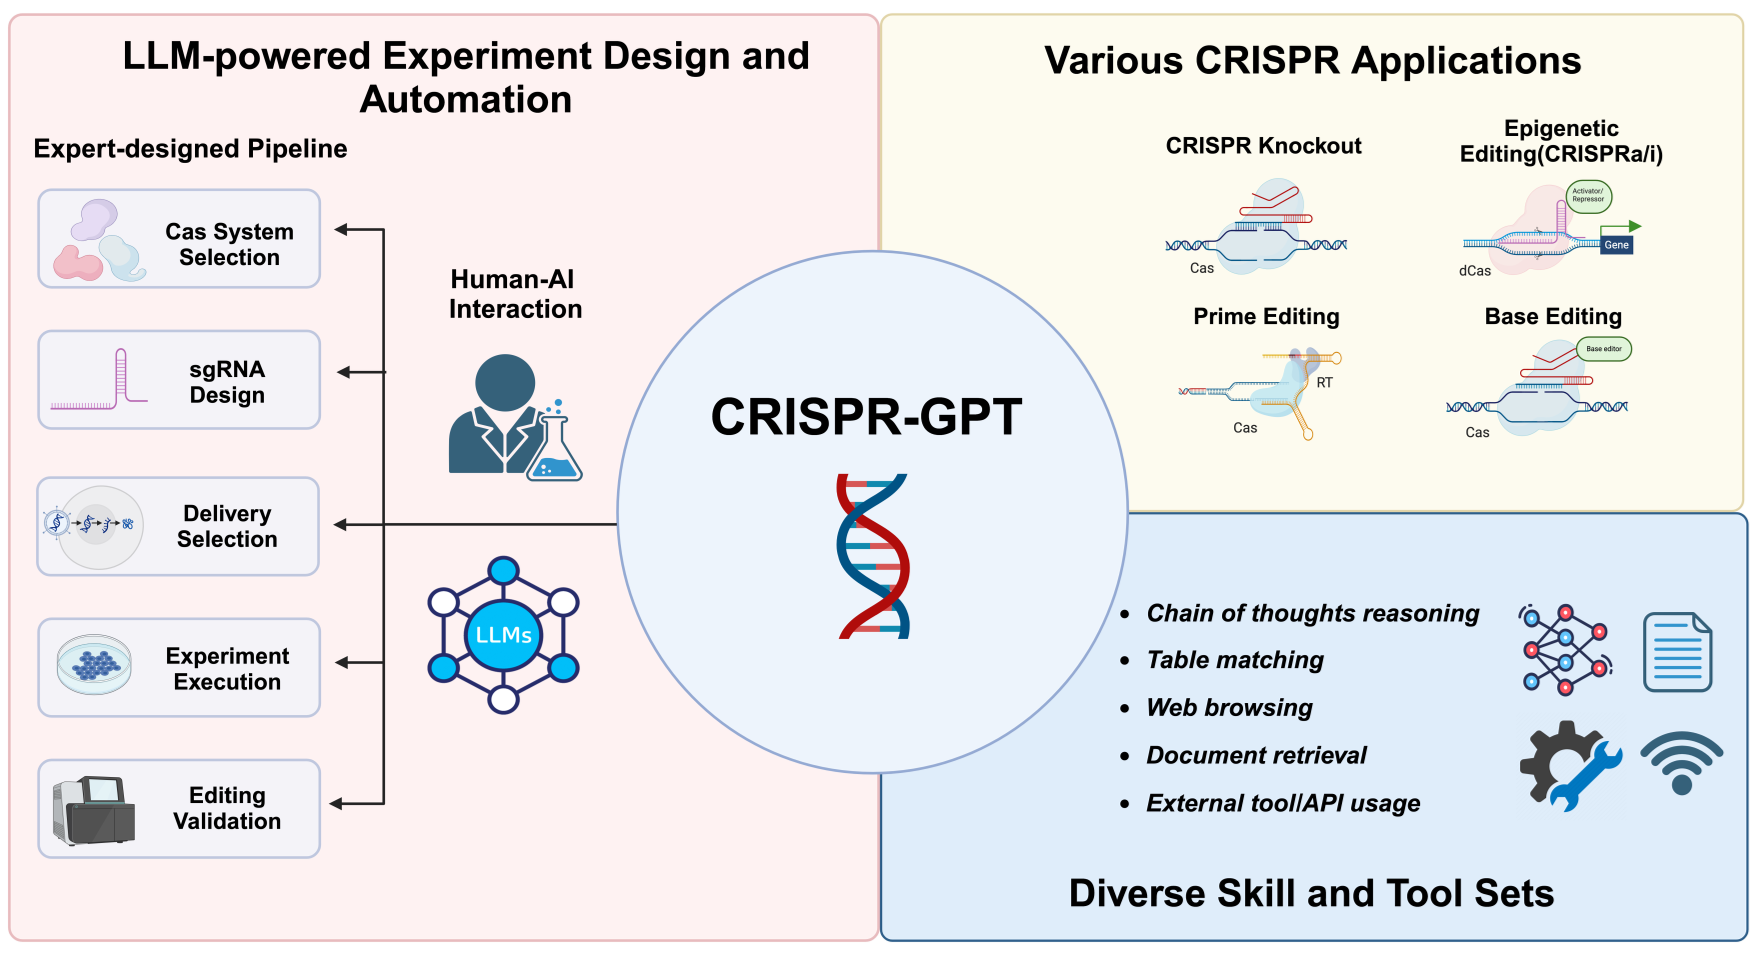

Figure 1: Overview of CRISPR-GPT Agent. The CRISPR-GPT is built upon an LLMpowered design and planning engine (left), which helps to complete 4 core meta-tasks (top right), as well as other auxiliary functions (freestyle Q&A, off-target prediction). CRISPR-GPT has integrated a set of useful skills and toolkits (bottom right) that the LLM agent would call when needed to facilitate human users across the different tasks and subtasks. Figure created with BioRender.com.
['/Users/zehrakorkusuz/figure-extractor/figures_folder/2404.18021v1-Table1-1.png']
figures_folder/2404.18021v1-Table1-1.png


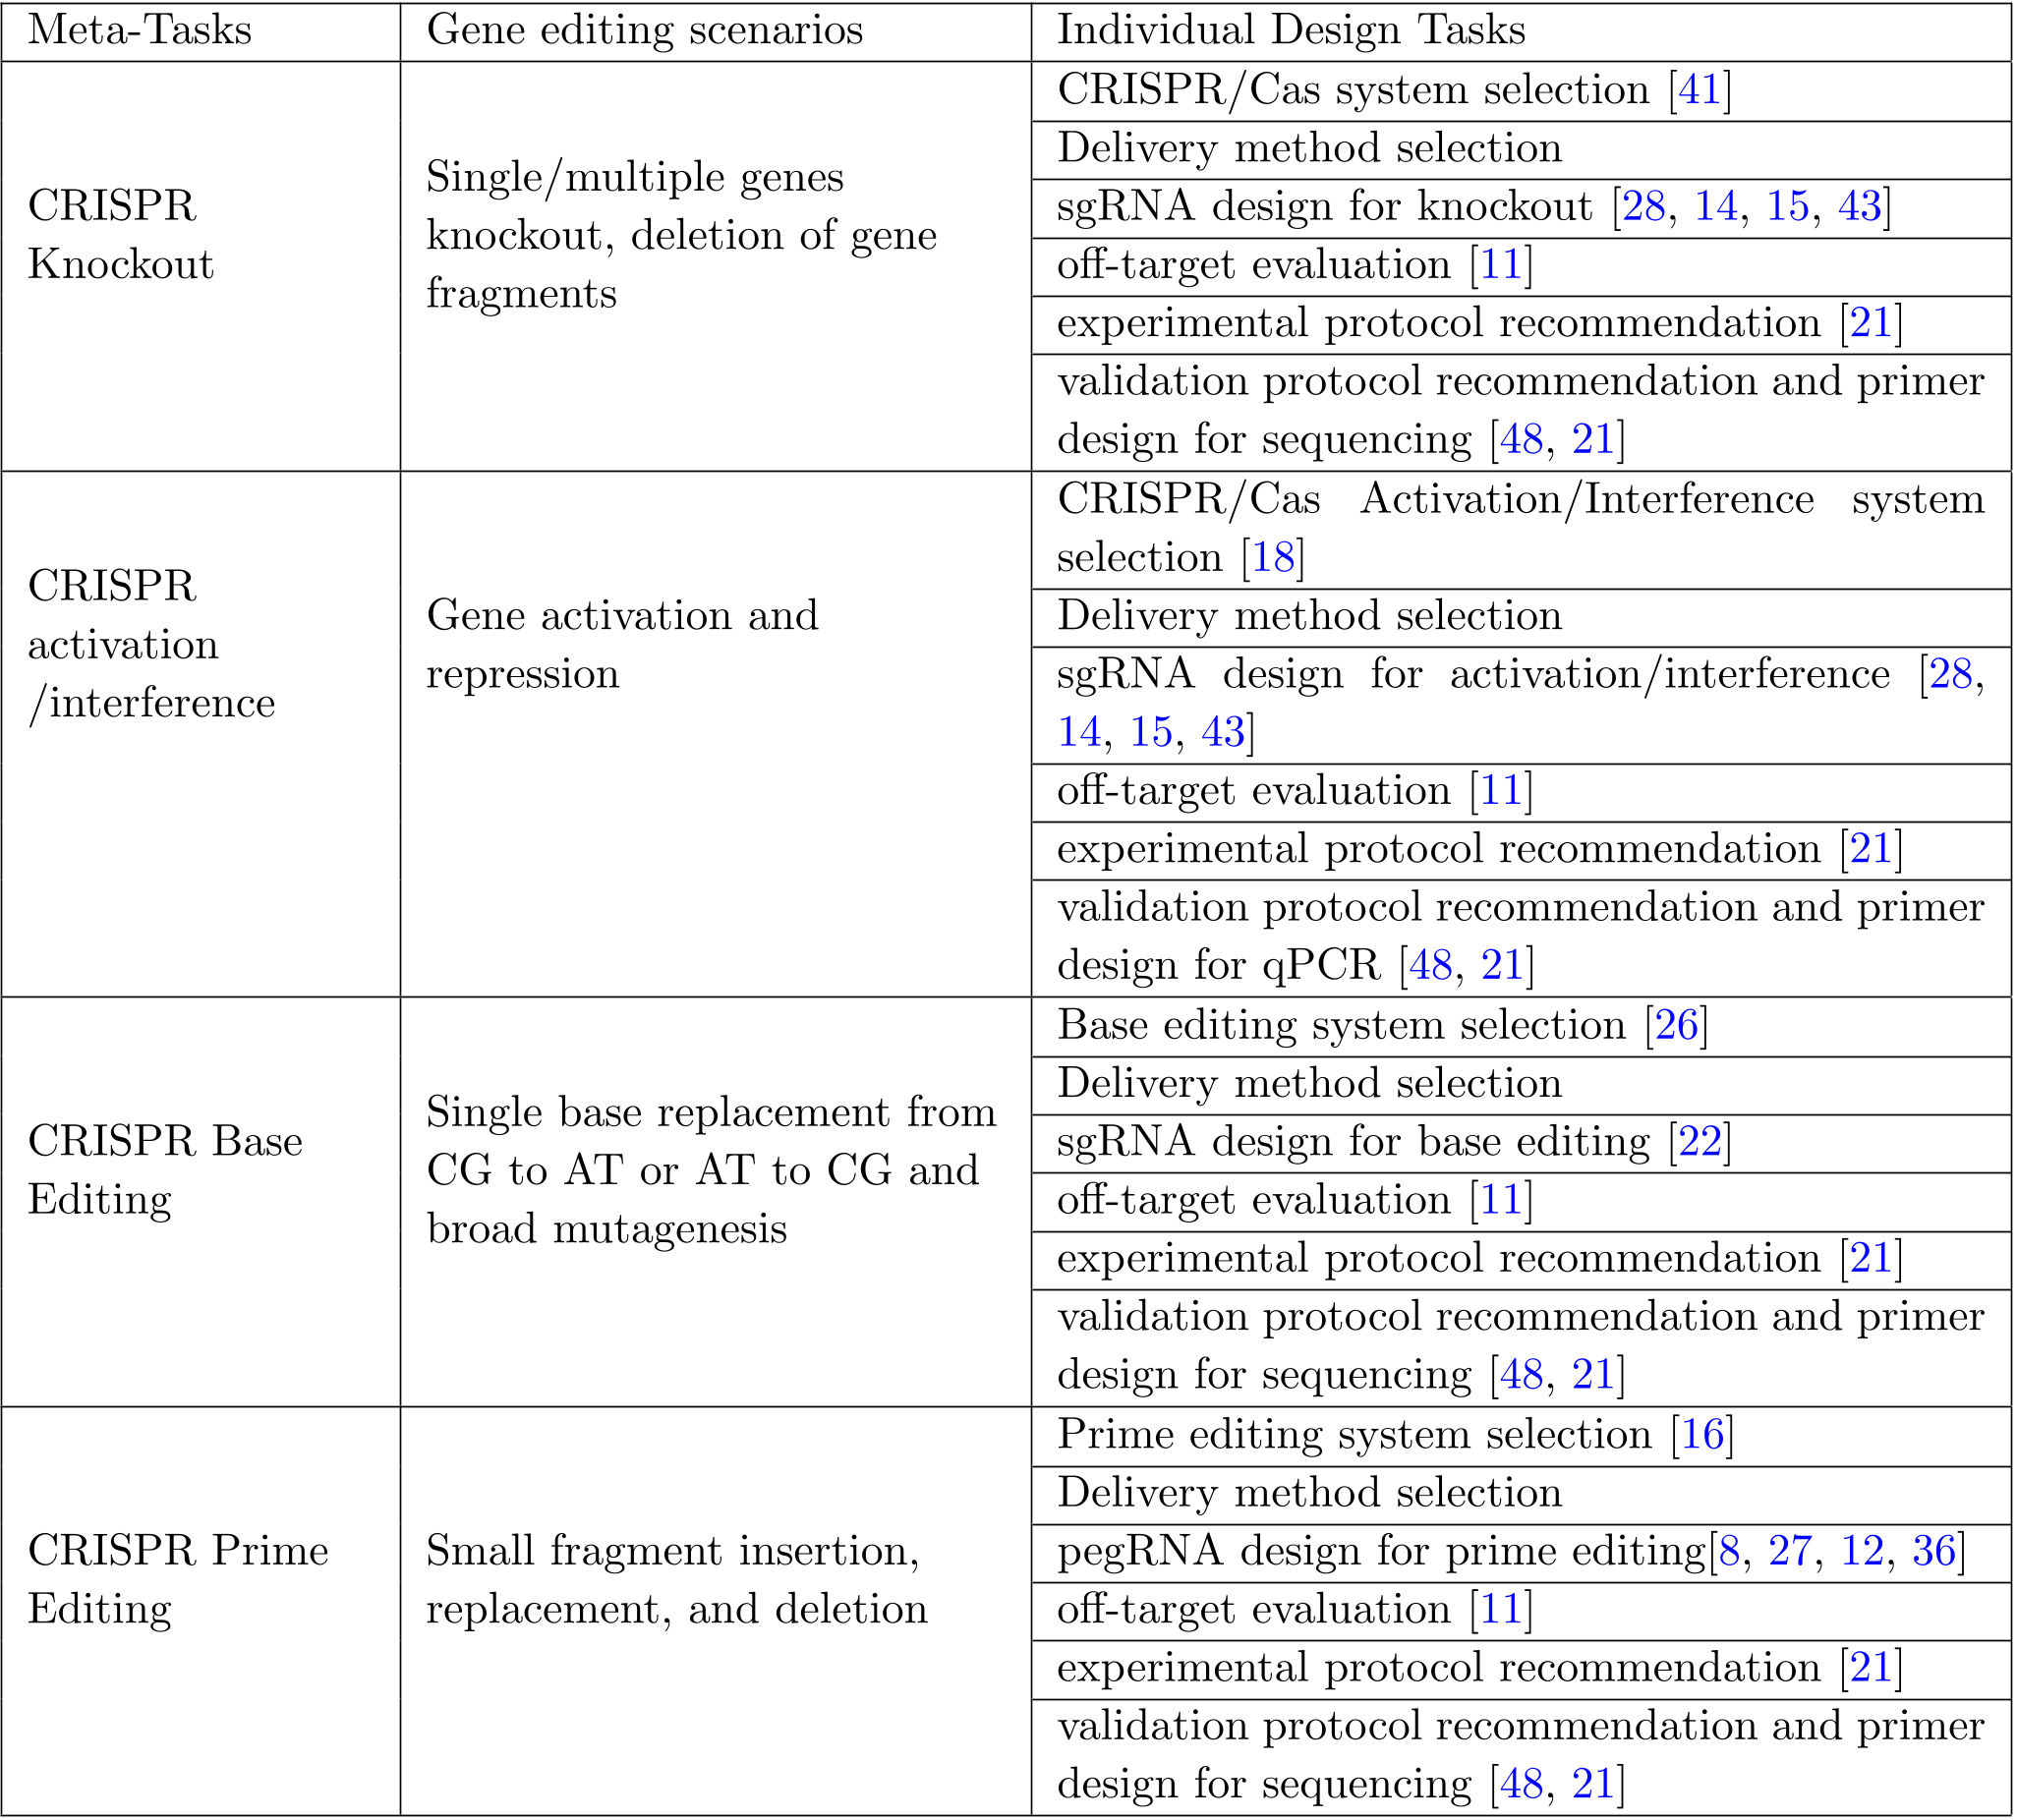

Table 1: List of meta-mode tasks (4 major meta-task and 22 specific tasks)


In [79]:
figure_1, caption_1, image_text = generate_display_image(extraction_result, "duplicate", "Figure", 1)  # Example: duplicate-Figure1-1.png
display(Image(filename=figure_1, width=400, height=600))
print(caption_1)


table_2, caption_2, image_text = generate_display_image(extraction_result, "2404.18021v1", "Table", 1)  # Example: 2404.18021v1-Table1-1.png
display(Image(filename=table_2, width=400, height=600))
print(caption_2)
